# Modeling Notebook

In [729]:
#import packages
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# 1. Data Preparation for modeling

## Import data

In [654]:
#load dataframe
df = pd.read_pickle('album_df.pkl')


In [558]:
df.head()

,album_run_time_ms,number_of_tracks,std_in_energy,std_in_popularity,std_in_danceability,std_in_tempo,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,time_signature_amax,popularity_amax,Score_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax,genres
007DWn799UWvfY1wwZeENR,3065169.0,15.0,0.072424,8.115241,0.061874,30.605883,0.871667,0.046364,0.000119,-7.147600,126.265133,0.695,0.454,0.5510,0.963,173.368,4,80.0,7.8,79,True,1.0,10.0,Rap
00ojDEHvnEOPOjhHrUrKy5,2886000.0,10.0,0.185253,1.433721,0.113543,17.959151,0.724300,0.374767,0.532800,-15.015700,100.700800,0.697,0.896,0.1460,0.874,120.006,4,7.0,7.4,79,False,1.0,11.0,Electronic
00oz3t7cI3WfwS2oEIZD6x,1670290.0,9.0,0.073569,4.898979,0.119798,47.645516,0.443889,0.957778,0.205918,-13.239333,118.242111,0.268,0.161,0.0512,0.342,207.893,5,45.0,8.4,1,False,1.0,11.0,Folk/Country
00uqjqwLruO346z3cNlNqG,2337540.0,13.0,0.204683,8.471672,0.108110,33.892371,0.562154,0.464462,0.011059,-6.111769,124.775154,0.911,0.570,0.2120,0.782,203.911,4,66.0,7.4,79,False,1.0,11.0,Pop/R&B
01ey0ETPITd3jiOiztRXzK,2840581.0,16.0,0.141410,0.885061,0.131997,35.961798,0.377625,0.406806,0.049877,-12.121375,105.696000,0.697,0.355,0.0607,0.543,181.821,4,4.0,7.1,79,True,1.0,9.0,ElectronicRock


In [559]:
df.shape

(1604, 24)

## Check for multicolinearity of features

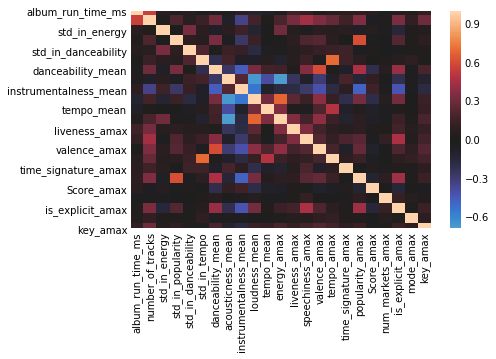

In [560]:
#look at heatmap
sns.heatmap(df.corr(), center=0)

In [561]:
#check for multicoliniar features above 0.75
abs(df.corr()) > 0.75

,album_run_time_ms,number_of_tracks,std_in_energy,std_in_popularity,std_in_danceability,std_in_tempo,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,time_signature_amax,popularity_amax,Score_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax
album_run_time_ms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
number_of_tracks,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
std_in_energy,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
std_in_popularity,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
std_in_danceability,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
std_in_tempo,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
danceability_mean,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
acousticness_mean,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
instrumentalness_mean,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
loudness_mean,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


#### This data set has no multicolinearity above 0.75 threshold

## Deal with categorical features by making dummy variables

In [640]:
#get dummies for categorical features
gen_dummies = pd.get_dummies(df['genres'], prefix='genre', drop_first=True)
explicit_dummies = pd.get_dummies(df['is_explicit_amax'], prefix='explicit', drop_first=True)
mode_dummies = pd.get_dummies(df['mode_amax'], prefix='mode', drop_first=True)
key_dummies = pd.get_dummies(df['key_amax'], prefix='key', drop_first=True)
signature_dummies = pd.get_dummies(df['time_signature_amax'], prefix='signature', drop_first=True)

In [641]:
#create dataframe with no categorical variables
df_no_cat = df.drop(['genres', 'is_explicit_amax', 'mode_amax', 'key_amax', 'time_signature_amax'], axis = 1)

In [642]:
#rename genre column to avoid naming error (/ and &)
gen_dummies.rename(columns={'genre_Folk/Country':'genre_Folk_Country', 'genre_Pop/R&B':'genre_Pop_RnB'}, inplace=True)

In [643]:
#change album run time columns from milliseconds to minutes and rename column
df_no_cat['album_run_time_ms'] = df_no_cat['album_run_time_ms'].apply(lambda x: x / 60000)
df_no_cat.rename(columns={'album_run_time_ms':'album_time_minutes'}, inplace=True)

In [644]:
#create final dataframe with dummies
df_fin = pd.concat([df_no_cat, gen_dummies, explicit_dummies, mode_dummies, key_dummies,
                    signature_dummies], axis=1)

In [592]:
df_fin.head()

,album_time_minutes,number_of_tracks,std_in_energy,std_in_popularity,std_in_danceability,std_in_tempo,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,popularity_amax,Score_amax,num_markets_amax,genre_ElectronicRock,genre_Experimental,genre_ExperimentalElectronic,genre_ExperimentalRock,genre_Folk_Country,genre_Global,genre_Jazz,genre_Metal,genre_Pop_RnB,genre_Rap,genre_Rock,explicit_True,mode_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,signature_4,signature_5
007DWn799UWvfY1wwZeENR,51.086150,15.0,0.072424,8.115241,0.061874,30.605883,0.871667,0.046364,0.000119,-7.147600,126.265133,0.695,0.454,0.5510,0.963,173.368,80.0,7.8,79,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
00ojDEHvnEOPOjhHrUrKy5,48.100000,10.0,0.185253,1.433721,0.113543,17.959151,0.724300,0.374767,0.532800,-15.015700,100.700800,0.697,0.896,0.1460,0.874,120.006,7.0,7.4,79,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
00oz3t7cI3WfwS2oEIZD6x,27.838167,9.0,0.073569,4.898979,0.119798,47.645516,0.443889,0.957778,0.205918,-13.239333,118.242111,0.268,0.161,0.0512,0.342,207.893,45.0,8.4,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
00uqjqwLruO346z3cNlNqG,38.959000,13.0,0.204683,8.471672,0.108110,33.892371,0.562154,0.464462,0.011059,-6.111769,124.775154,0.911,0.570,0.2120,0.782,203.911,66.0,7.4,79,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
01ey0ETPITd3jiOiztRXzK,47.343017,16.0,0.141410,0.885061,0.131997,35.961798,0.377625,0.406806,0.049877,-12.121375,105.696000,0.697,0.355,0.0607,0.543,181.821,4.0,7.1,79,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0


# 2. Modeling

## Create a baseline model using mean as the prediction

In [645]:
#assign random feature to X
X = df_fin[['popularity_amax']].values

#assign target variable to y
y = df['Score_amax'].values

#perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)

In [646]:
#instantiate dummy regressor which will always predict the mean of the target
dummy_regr = DummyRegressor(strategy="mean")

#fit training data
dummy_regr.fit(X_train, y_train)

#generate predictions for test data
y_pred_dummy = dummy_regr.predict(X_test)

In [647]:
#get R^2 score of dummy regressor
dummy_regr.score(X_test, y_test)

-2.0689561917475174e-05

In [607]:
#get the evaluation metrics of the baseline
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_dummy))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_dummy))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_dummy)))

Mean Absolute Error: 0.755143100647577
Mean Squared Error: 1.0720589420365523
Root Mean Squared Error: 1.0354027921715068


#### The RMSE of the dummy regressor is 1.04 which will be the evaluation metric to try and bring down.

## Data preparation for further modeling

In [648]:
#assign features and taget columns to variables
features = df_fin.drop(['Score_amax'], axis=1)
target = df_fin['Score_amax']

#### Identify data that needs to be scaled or transformed by looking at each feature's distribution

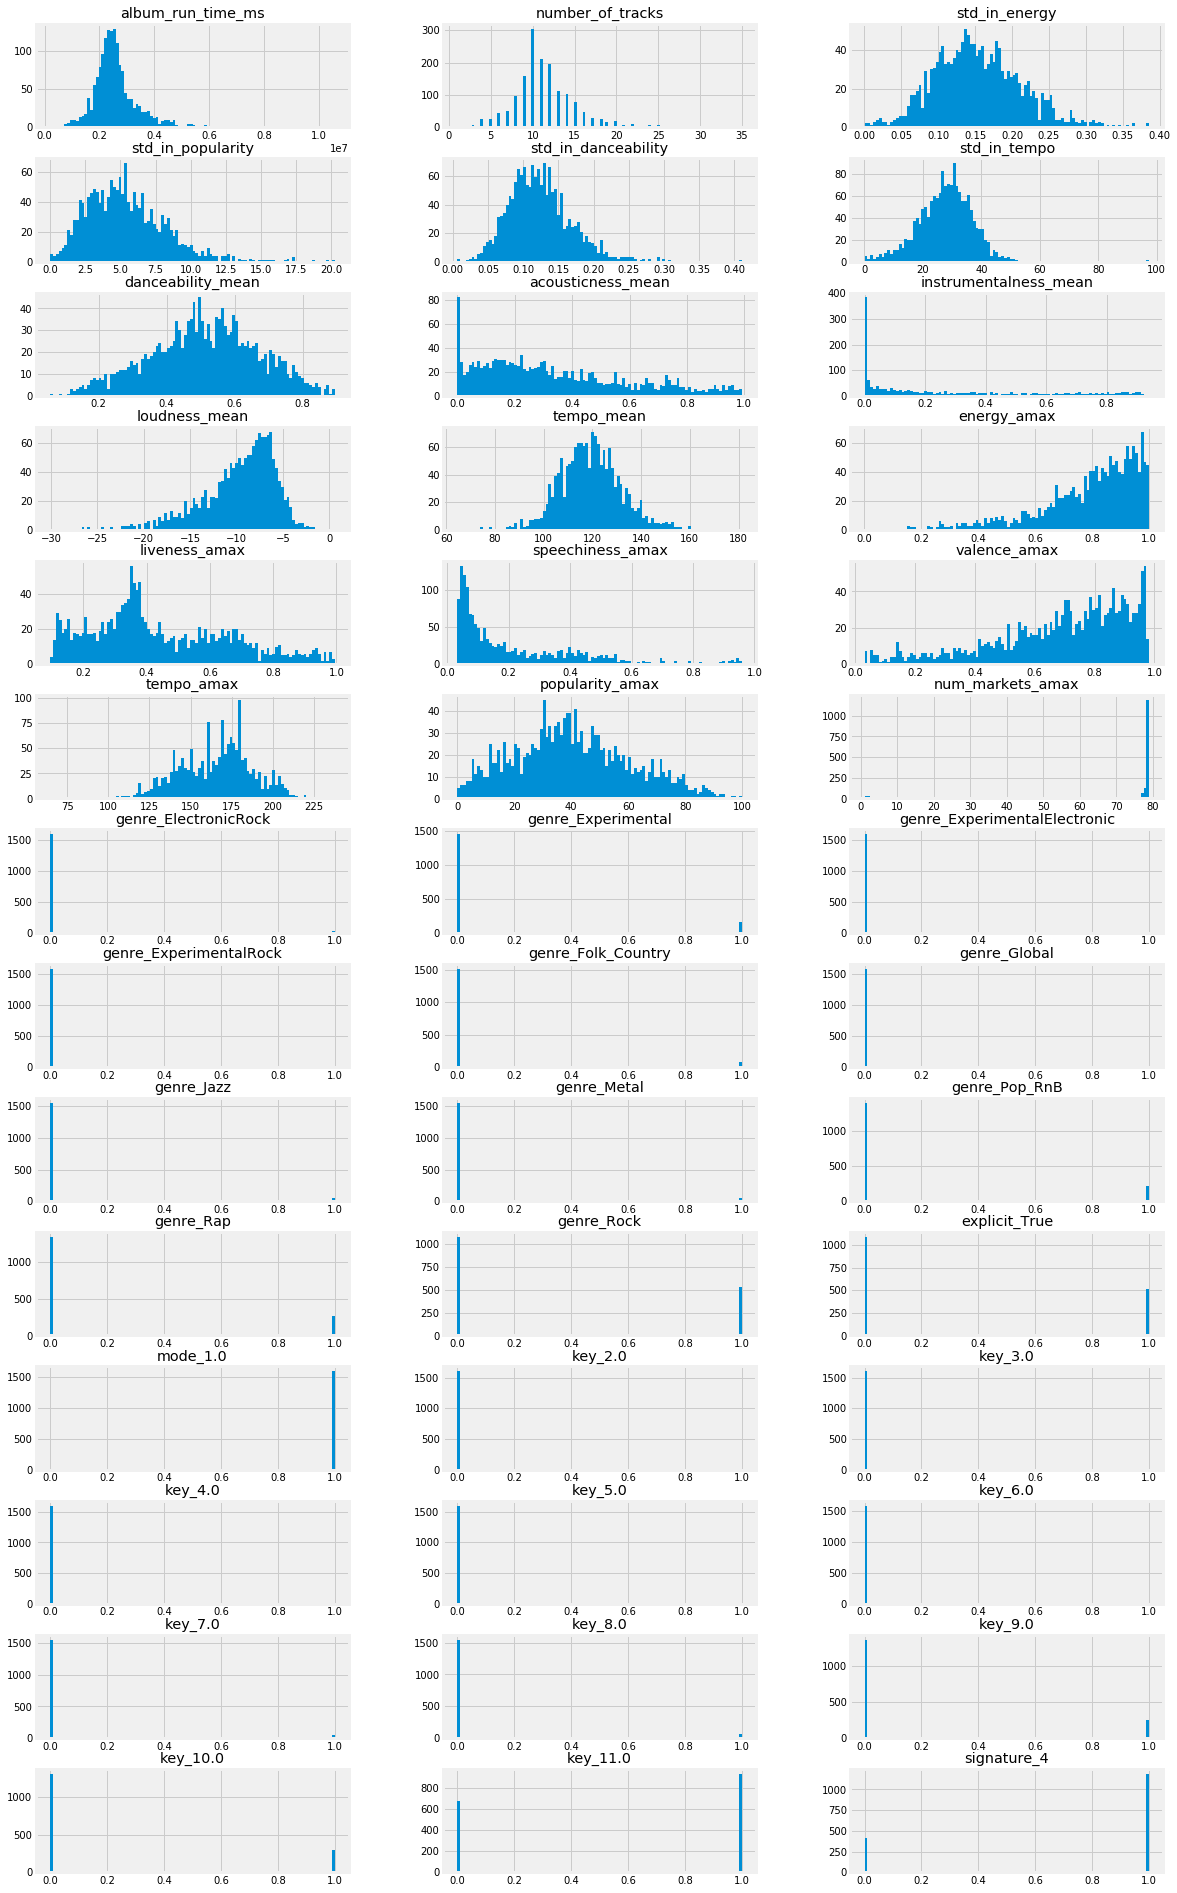

In [587]:
fig, axes = plt.subplots(len(features.columns)//3, 3, figsize=(18, 34))

i = 0
for triaxis in axes:
    for axis in triaxis:
        features.hist(column = features.columns[i], bins = 100, ax=axis)
        i = i+1

#### Scale features using standard scaler to remove magnitude of some features which can have an effect on model parameters

In [649]:
#make a copy of the features df
transformed_features = features.copy()

# Initialize the scaler
scaler = StandardScaler()

#make a list of features that need to be scaled
cols_to_norm = ['album_time_minutes', 'number_of_tracks','loudness_mean', 'tempo_mean',
                'tempo_amax', 'popularity_amax', 'num_markets_amax', 'std_in_tempo',
                'std_in_danceability', 'std_in_popularity']

# Scale the above features
transformed_features[cols_to_norm] = scaler.fit_transform(features[cols_to_norm])

In [650]:
#fill null values if any
transformed_features.fillna(method = 'ffill', inplace=True)

In [651]:
#train test split transformed features and target (80/20)
X_train, X_test, y_train, y_test = train_test_split(transformed_features, target, random_state=20, test_size=0.2)

#### Create function that runs a specified model and outputs training/testing R^2 and RMSE. It will also append the results to a dataframe.

In [656]:
#create dataframe to be filled with model evaluation metrics - start with baseline results
d = {'Model' : 'Mean Baseline', 'Train R^2':'null', 'Train RMSE':'null', 'Test R^2': dummy_regr.score(X_test, y_test),
     'Test RMSE':np.sqrt(mean_squared_error(y_test, y_pred_dummy))}

#turn dictionary into series
series_model_performance = pd.Series(d)

#turn series into dataframe and transpose to switch columns and index
df_model_performance = series_model_performance.to_frame().transpose()

In [706]:
#create function to run a model and append to dataframe of results
def run_model(model, X_train, X_test, y_train, y_test, df):
    
    #acquire model evaluation metrics for training data
    print('Training R^2 :', model.score(X_train, y_train))
    train_r2 = model.score(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    print('Training Root Mean Square Error', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    print('\n----------------\n')
    
    #acquire model evaluation metrics for testing data
    print('Testing R^2 :', model.score(X_test, y_test))
    test_r2 = model.score(X_test, y_test)
    
    y_pred_test = model.predict(X_test)
    print('Testing Root Mean Square Error', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    #append results to dataframe
    f = {'Model' : model, 'Train R^2':train_r2, 'Train RMSE':train_rmse, 'Test R^2': test_r2,
         'Test RMSE':test_rmse}
    series1 = pd.Series(f)
    df1 = series1.to_frame().transpose()
    df = df.append([df1], ignore_index=True)
    
    return df

## Run Models

In [707]:
#simple linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
df_model_performance = run_model(lm, X_train, X_test, y_train, y_test, df_model_performance)

Training R^2 : 0.08479451643109637
Training Root Mean Square Error 0.9420934051762255

----------------

Testing R^2 : 0.08099497317706561
Testing Root Mean Square Error 0.9925760289656683


In [709]:
#create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly_train = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names(features.columns))
X_poly_test = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names(features.columns))
X_poly_train.head()

,album_time_minutes,number_of_tracks,std_in_energy,std_in_popularity,std_in_danceability,std_in_tempo,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,popularity_amax,num_markets_amax,genre_ElectronicRock,genre_Experimental,genre_ExperimentalElectronic,genre_ExperimentalRock,genre_Folk_Country,genre_Global,genre_Jazz,genre_Metal,genre_Pop_RnB,genre_Rap,genre_Rock,explicit_True,mode_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,signature_4,signature_5,album_time_minutes^2,album_time_minutes number_of_tracks,album_time_minutes std_in_energy,album_time_minutes std_in_popularity,album_time_minutes std_in_danceability,album_time_minutes std_in_tempo,album_time_minutes danceability_mean,album_time_minutes acousticness_mean,album_time_minutes instrumentalness_mean,album_time_minutes loudness_mean,album_time_minutes tempo_mean,album_time_minutes energy_amax,album_time_minutes liveness_amax,album_time_minutes speechiness_amax,album_time_minutes valence_amax,album_time_minutes tempo_amax,album_time_minutes popularity_amax,album_time_minutes num_markets_amax,album_time_minutes genre_ElectronicRock,album_time_minutes genre_Experimental,album_time_minutes genre_ExperimentalElectronic,album_time_minutes genre_ExperimentalRock,album_time_minutes genre_Folk_Country,album_time_minutes genre_Global,album_time_minutes genre_Jazz,album_time_minutes genre_Metal,album_time_minutes genre_Pop_RnB,album_time_minutes genre_Rap,album_time_minutes genre_Rock,album_time_minutes explicit_True,album_time_minutes mode_1.0,album_time_minutes key_2.0,album_time_minutes key_3.0,album_time_minutes key_4.0,album_time_minutes key_5.0,album_time_minutes key_6.0,album_time_minutes key_7.0,album_time_minutes key_8.0,album_time_minutes key_9.0,album_time_minutes key_10.0,album_time_minutes key_11.0,album_time_minutes signature_4,album_time_minutes signature_5,number_of_tracks^2,number_of_tracks std_in_energy,number_of_tracks std_in_popularity,number_of_tracks std_in_danceability,number_of_tracks std_in_tempo,number_of_tracks danceability_mean,number_of_tracks acousticness_mean,number_of_tracks instrumentalness_mean,number_of_tracks loudness_mean,number_of_tracks tempo_mean,number_of_tracks energy_amax,number_of_tracks liveness_amax,number_of_tracks speechiness_amax,number_of_tracks valence_amax,number_of_tracks tempo_amax,number_of_tracks popularity_amax,number_of_tracks num_markets_amax,number_of_tracks genre_ElectronicRock,number_of_tracks genre_Experimental,number_of_tracks genre_ExperimentalElectronic,number_of_tracks genre_ExperimentalRock,number_of_tracks genre_Folk_Country,number_of_tracks genre_Global,number_of_tracks genre_Jazz,number_of_tracks genre_Metal,number_of_tracks genre_Pop_RnB,number_of_tracks genre_Rap,number_of_tracks genre_Rock,number_of_tracks explicit_True,number_of_tracks mode_1.0,number_of_tracks key_2.0,number_of_tracks key_3.0,number_of_tracks key_4.0,number_of_tracks key_5.0,number_of_tracks key_6.0,number_of_tracks key_7.0,number_of_tracks key_8.0,number_of_tracks key_9.0,number_of_tracks key_10.0,number_of_tracks key_11.0,number_of_tracks signature_4,number_of_tracks signature_5,std_in_energy^2,std_in_energy std_in_popularity,std_in_energy std_in_danceability,std_in_energy std_in_tempo,std_in_energy danceability_mean,std_in_energy acousticness_mean,std_in_energy instrumentalness_mean,std_in_energy loudness_mean,std_in_energy tempo_mean,std_in_energy energy_amax,std_in_energy liveness_amax,std_in_energy speechiness_amax,std_in_energy valence_amax,std_in_energy tempo_amax,std_in_energy popularity_amax,std_in_energy num_markets_amax,std_in_energy genre_ElectronicRock,std_in_energy genre_Experimental,std_in_energy genre_ExperimentalElectronic,std_in_energy genre_ExperimentalRock,std_in_energy genre_Folk_Country,std_in_energy genre_Global,std_in_energy genre_Jazz,std_in_energy genre_Metal,std_in_energy g

In [710]:
#use linear regression on polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

df_model_performance = run_model(lr_poly, X_poly_train, X_poly_test, y_train, y_test, df_model_performance)

Training R^2 : 0.4633868073848859
Training Root Mean Square Error 0.7213820466857811

----------------

Testing R^2 : -1.480826194724506e+24
Testing Root Mean Square Error 1259960364048.9497


In [713]:
threshold_ranges = np.linspace(0, 2, num=6)

for thresh in threshold_ranges:
    print(thresh)
    selector = VarianceThreshold(thresh)
    reduced_feature_train = selector.fit_transform(X_poly_train)
    reduced_feature_test = selector.transform(X_poly_test)
    lr = LinearRegression()
    lr.fit(reduced_feature_train, y_train)
    df_model_performance = run_model(lr, reduced_feature_train, reduced_feature_test, y_train, y_test, df_model_performance)
    print('--------------------------------------------------------------------')

0.0
Training R^2 : 0.46877592125474277
Training Root Mean Square Error 0.7177505482262114

----------------

Testing R^2 : -6.958612945254168e+23
Testing Root Mean Square Error 863706483146.7892
--------------------------------------------------------------------
0.4
Training R^2 : 0.16203141590589298
Training Root Mean Square Error 0.9014642854738936

----------------

Testing R^2 : -5.35738828405728e+21
Testing Root Mean Square Error 75784676479.93802
--------------------------------------------------------------------
0.8
Training R^2 : 0.1255380341354141
Training Root Mean Square Error 0.9208844070618811

----------------

Testing R^2 : -6.299913145951103e+21
Testing Root Mean Square Error 82181132203.68674
--------------------------------------------------------------------
1.2000000000000002
Training R^2 : 0.04457979438456028
Training Root Mean Square Error 0.9625689929281758

----------------

Testing R^2 : -0.18309379522309732
Testing Root Mean Square Error 1.1261971592269509
-

In [715]:
selector = SelectKBest(score_func=f_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test= selector.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_k_best_train ,y_train)
df_model_performance = run_model(lr,X_k_best_train,X_k_best_test,y_train,y_test, df_model_performance)

Training R^2 : 0.07688809706988597
Training Root Mean Square Error 0.946154005657275

----------------

Testing R^2 : 0.07670295811420713
Testing Root Mean Square Error 0.994891135355009


In [716]:
selector = SelectKBest(score_func=mutual_info_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test= selector.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_k_best_train ,y_train)
df_model_performance = run_model(lr,X_k_best_train,X_k_best_test,y_train,y_test, df_model_performance)

Training R^2 : 0.0212207603128991
Training Root Mean Square Error 0.9742648440149712

----------------

Testing R^2 : 0.017706105837266728
Testing Root Mean Square Error 1.0261847619678492


In [717]:
rfe = RFECV(LinearRegression(),cv=5)
X_rfe_train = rfe.fit_transform(X_poly_train, y_train)
X_rfe_test = rfe.transform(X_poly_test)
lm = LinearRegression().fit(X_rfe_train, y_train)
df_model_performance = run_model(lm, X_rfe_train, X_rfe_test, y_train, y_test, df_model_performance)
print ('The optimal number of features is: ', rfe.n_features_)

Training R^2 : 0.030559977593811127
Training Root Mean Square Error 0.9696056320383859

----------------

Testing R^2 : 0.0501219109978045
Testing Root Mean Square Error 1.0091106138035413
The optimal number of features is:  8


In [718]:
lasso = LassoCV(max_iter=100000, cv=5)
lasso.fit(X_train, y_train)
df_model_performance = run_model(lasso,X_train, X_test, y_train, y_test, df_model_performance)
print('The optimal alpha for the Lasso Regression is: ', lasso.alpha_)

Training R^2 : 0.06428539979214443
Training Root Mean Square Error 0.9525907495694492

----------------

Testing R^2 : 0.06034680208807941
Testing Root Mean Square Error 1.0036646709703736
The optimal alpha for the Lasso Regression is:  0.009061662613772491


In [719]:
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
df_model_performance = run_model(ridge,X_train, X_test, y_train, y_test, df_model_performance)
print('The optimal alpha for the Ridge Regression is: ', ridge.alpha_)

Training R^2 : 0.08038013137387146
Training Root Mean Square Error 0.9443627099158357

----------------

Testing R^2 : 0.0771079216276378
Testing Root Mean Square Error 0.9946729288737509
The optimal alpha for the Ridge Regression is:  10.0


In [720]:
lasso2 = LassoCV(max_iter=100000, cv=5)

lasso2.fit(X_poly_train, y_train)
df_model_performance = run_model(lasso2, X_poly_train, X_poly_test, y_train, y_test, df_model_performance)
print('The optimal alpha for the Lasso Regression is: ', lasso2.alpha_)

Training R^2 : 0.0707571834553764
Training Root Mean Square Error 0.9492907806901293

----------------

Testing R^2 : 0.06121118637507406
Testing Root Mean Square Error 1.0032029306286232
The optimal alpha for the Lasso Regression is:  0.037228500325934444


In [722]:
lasso = Lasso(alpha= model_aic.alpha_) 
lasso.fit(X_train, y_train)

# Print R2 and MSE
print('Training r^2:', lasso.score(X_train, y_train))
print('Test r^2:', lasso.score(X_test, y_test))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, lasso.predict(X_train))))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

Training r^2: 0.080824081621237
Test r^2: 0.08162372232214088
Training RMSE: 0.9441347349210246
Test RMSE: 0.9922364290226484


In [526]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

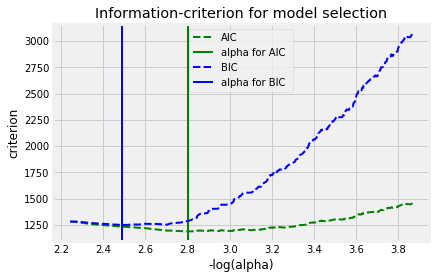

In [527]:
model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X_poly_train, y_train)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_poly_train, y_train)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color, linewidth=2, label= name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=2,
                label='alpha for %s ' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'green')
plot_ic_criterion(model_bic, 'BIC', 'blue')
plt.legend()
plt.title('Information-criterion for model selection');

In [536]:
# Code for lasso with alpha from BIC
lasso = Lasso(alpha= model_bic.alpha_) 
lasso.fit(X_train, y_train)

# Print R2 and MSE
print('Training r^2:', lasso.score(X_train, y_train))
print('Test r^2:', lasso.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Test MSE:', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

Training r^2: 0.07931922067904285
Test r^2: 0.0742002677294763
Training MSE: 0.8928497685914208
Test MSE: 0.9962385995857008


In [540]:
# Code for ridge with alpha from BIC
ridge3 = Ridge(alpha= model_bic.alpha_) 
ridge3.fit(X_train, y_train)

# Print R2 and MSE
print('Training r^2:', ridge3.score(X_train, y_train))
print('Test r^2:', ridge3.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge3.predict(X_train)))
print('Test MSE:', np.sqrt(mean_squared_error(y_test, ridge3.predict(X_test))))

Training r^2: 0.08939336788997887
Test r^2: 0.07499410254575223
Training MSE: 0.8830801500568901
Test MSE: 0.9958113913781178


In [736]:
df_model_performance.head()

,Model,Train R^2,Train RMSE,Test R^2,Test RMSE
0,Mean Baseline,null,null,-2.06896e-05,1.0354
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.0847945,0.942093,0.080995,0.992576
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.463387,0.721382,-1.48083e+24,1.25996e+12
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.468776,0.717751,-6.95861e+23,8.63706e+11
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.162031,0.901464,-5.35739e+21,7.57847e+10


In [735]:
#sort dataframe by best test rmse score
df_model_performance_sorted = df_model_performance.sort_values(by = 'Test RMSE', ascending=True)
df_model_performance_sorted

,Model,Train R^2,Train RMSE,Test R^2,Test RMSE
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.0847945,0.942093,0.080995,0.992576
13,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=5...",0.0803801,0.944363,0.0771079,0.994673
9,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.0768881,0.946154,0.076703,0.994891
14,"LassoCV(alphas=None, copy_X=True, cv=5, eps=0....",0.0707572,0.949291,0.0612112,1.0032
12,"LassoCV(alphas=None, copy_X=True, cv=5, eps=0....",0.0642854,0.952591,0.0603468,1.00366
11,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.03056,0.969606,0.0501219,1.00911
10,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.0212208,0.974265,0.0177061,1.02618
0,Mean Baseline,null,null,-2.06896e-05,1.0354
8,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.0180812,0.975826,-0.0262183,1.04888
7,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.018612,0.975562,-0.026482,1.04901


### Best Model:

In [723]:
#best linear regression model - no polynomial features
lm = LinearRegression()
lm.fit(X_train, y_train)
run_model(lm, X_train, X_test, y_train, y_test, df_model_performance)

Training R^2 : 0.08479451643109637
Training Root Mean Square Error 0.9420934051762255

----------------

Testing R^2 : 0.08099497317706561
Testing Root Mean Square Error 0.9925760289656683


,Model,Train R^2,Train RMSE,Test R^2,Test RMSE
0,Mean Baseline,null,null,-2.06896e-05,1.0354
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.0847945,0.942093,0.080995,0.992576
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.463387,0.721382,-1.48083e+24,1.25996e+12
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.468776,0.717751,-6.95861e+23,8.63706e+11
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.162031,0.901464,-5.35739e+21,7.57847e+10
5,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.125538,0.920884,-6.29991e+21,8.21811e+10
6,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.0445798,0.962569,-0.183094,1.1262
7,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.018612,0.975562,-0.026482,1.04901
8,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.0180812,0.975826,-0.0262183,1.04888
9,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.0768881,0.946154,0.076703,0.994891


Text(0, 0.5, 'Feature')

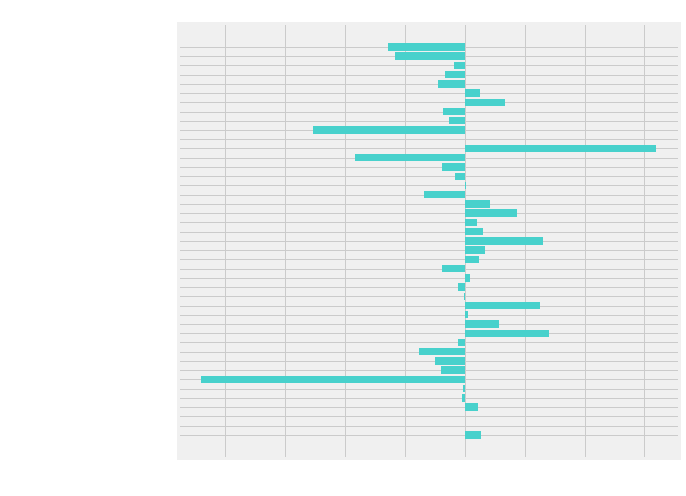

In [747]:
#determine feature importances
n_features = X_train.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), lm.coef_, align='center', color='mediumturquoise')
plt.title('Feature Importance Plot', color='white')
plt.yticks(np.arange(n_features), X_train.columns.values, color='white')
plt.xlabel('Feature importance', color='white')
plt.xticks(color='white')
plt.ylabel('Feature', color='white')

#### It looks as though some interesting genres like jazz and experimental rock are favored while pop/R&B is rated more poorly. The most negative impacts on the pitchfork score is danceability and key 4,  and the most poitive impact are key 2 and high energy and valence.